# Artificial Intelligence Lab 2

## Set Up

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Set random seed for reproducibility
np.random.seed(42)
# Configure matplotlib
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
print("Libraries loaded successfully!")

Libraries loaded successfully!


## Exercise 1: Implement an MLP Class

In [259]:
class MLP:
    """
    Multi-Layer Perceptron with one hidden layer.
    Uses sigmoid activation and backpropagation.
    """
    
    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.1):
        """
        Initialise the MLP.
        
        Parameters:
        ----------
        n_inputs : int
            Number of input features
        n_hidden : int
            Number of hidden neurons
        n_outputs : int
            Number of output neurons
        learning_rate : float
            Learning rate for weight updates
        """
        self.learning_rate = learning_rate

        # Input to hidden layer weights (weights_ih) and biases (bias_h)
        self.weights_ih = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
        self.bias_h = np.random.uniform(-0.5, 0.5, n_hidden)
        
        # Hidden to output layer weights (weights_ho) and biases (bias_o)
        self.weights_ho = np.random.uniform(-0.5, 0.5, (n_hidden, n_outputs))
        self.bias_o = np.random.uniform(-0.5, 0.5, n_outputs)
    
    def sigmoid(self, x):
        """Sigmoid activation function."""
        # Clip to avoid overflow in exp
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x) * (1 - σ(x))."""
        return x * (1 - x)
    
    def forward(self, X):
        """
        Forward pass through the network.
        
        Parameters:
        ----------
        X : array-like, shape (n_samples, n_inputs)
            Input data
            
        Returns:
        -------
        array : Output activations
        """
        # Hidden layer
        self.hidden_input = np.dot(X, self.weights_ih) + self.bias_h
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Output layer
        self.output_input = np.dot(self.hidden_output, self.weights_ho) + self.bias_o
        self.output = self.sigmoid(self.output_input)
        
        return self.output
    
    def backward(self, X, y):
        """
        Backward pass (backpropagation).
        
        Parameters:
        ----------
        X : array-like, shape (n_samples, n_inputs)
            Input data
        y : array-like, shape (n_samples, n_outputs)
            Target outputs
        """
        # Output layer error
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)
        
        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_ho += self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_o += self.learning_rate * np.sum(output_delta, axis=0)
        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_h += self.learning_rate * np.sum(hidden_delta, axis=0)
    
    def train(self, X, y, epochs, verbose=True):
        """
        Train the network.
        
        Parameters:
        ----------
        X : array-like, shape (n_samples, n_inputs)
            Training inputs
        y : array-like, shape (n_samples, n_outputs)
            Training targets
        epochs : int
            Number of training epochs
        verbose : bool

        Print progress if True
            
        Returns:
        -------
        list : Training loss history
        """
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss (Mean Squared Error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y)
            
            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}: Loss = {loss:.6f}")
        
        return losses
    
    def predict(self, X):
        """
        Make predictions.
        
        Returns the class with highest output activation.
        """
        output = self.forward(X)
        return np.argmax(output, axis=1)
print("MLP class defined successfully!")


MLP class defined successfully!


## Exercise 2: Test the MLP on XOR

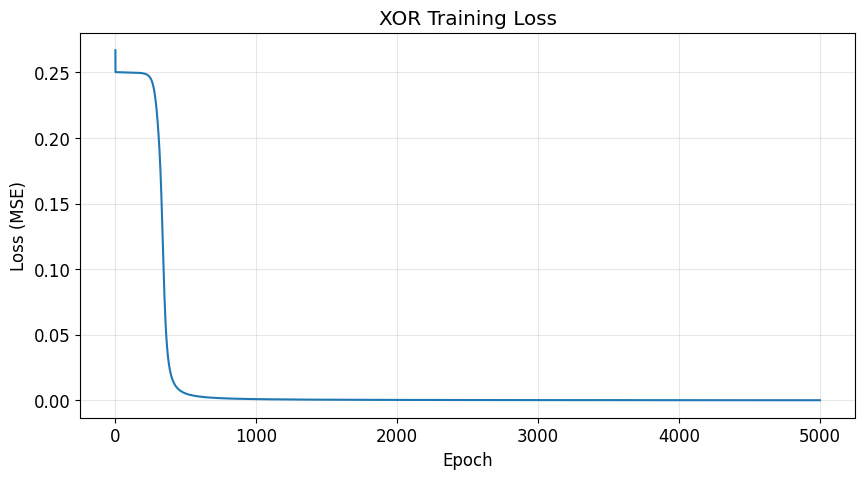


XOR Predictions:
--------------------------------------------------
Input: [0 0] -> Output: 0.0099 -> Rounded: 0 (Expected: 0) ✓
Input: [0 1] -> Output: 0.9879 -> Rounded: 1 (Expected: 1) ✓
Input: [1 0] -> Output: 0.9909 -> Rounded: 1 (Expected: 1) ✓
Input: [1 1] -> Output: 0.0102 -> Rounded: 0 (Expected: 0) ✓


In [260]:
# Define XOR data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Create and train MLP
np.random.seed(42)
mlp_xor = MLP(n_inputs=2, n_hidden=4, n_outputs=1, learning_rate=2.0)
losses_xor = mlp_xor.train(X_xor, y_xor, epochs=5000, verbose=False)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_xor)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('XOR Training Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Test predictions
print("\nXOR Predictions:")
print("-" * 50)
for i in range(len(X_xor)):
    output = mlp_xor.forward(X_xor[i:i+1])
    rounded = round(output[0][0])
    correct = "✓" if rounded == y_xor[i][0] else "✗"
    print(f"Input: {X_xor[i]} -> Output: {output[0][0]:.4f} -> Rounded: {rounded} (Expected: {y_xor[i][0]}) {correct}")


## Exercise 3: Load and Prepare the Iris Dataset

### Task 3.1: Load and Explore the Data

In [261]:

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print("Iris Dataset Overview")
print("=" * 50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"\nClass distribution: {np.bincount(y)}")

Iris Dataset Overview
Features shape: (150, 4)
Target shape: (150,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Class distribution: [50 50 50]


### Task 3.2: Normalise the Data

In [262]:
# Normalise features to [0, 1]
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)
print("Data Normalisation")
print("=" * 50)
print("Before normalisation:")
print(f"  Min: {X.min(axis=0)}")
print(f"  Max: {X.max(axis=0)}")
print("\nAfter normalisation:")
print(f"  Min: {X_normalised.min(axis=0)}")
print(f"  Max: {X_normalised.max(axis=0)}")

Data Normalisation
Before normalisation:
  Min: [4.3 2.  1.  0.1]
  Max: [7.9 4.4 6.9 2.5]

After normalisation:
  Min: [0. 0. 0. 0.]
  Max: [1. 1. 1. 1.]


### Task 3.3: One-Hot Encode the Targets

In [263]:
# One-hot encode targets
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print("One-Hot Encoding")
print("=" * 50)
print(f"Original y[:5]: {y[:5]}")
print(f"\nOne-hot y[:5]:")
print(y_onehot[:5])
print(f"\nEncoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]")

One-Hot Encoding
Original y[:5]: [0 0 0 0 0]

One-hot y[:5]:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Encoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]


### Task 3.4: Split into Training and Test Sets

In [264]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_normalised, y_onehot, test_size=0.2, random_state=42, stratify=y
)
# Also keep original labels for evaluation
_, _, y_train_labels, y_test_labels = train_test_split(
    X_normalised, y, test_size=0.2, random_state=42, stratify=y
)
print("Train/Test Split")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train/Test Split
Training set: 120 samples
Test set: 30 samples


## Exercise 4: Train the MLP on Iris

### Task 4.1: Create and Train the Network

In [265]:
np.random.seed(42)
# Create MLP: 4 inputs, 8 hidden, 3 outputs, learning rate = 0.5
# TODO: add code here to create MLP
## Hint: see Exercise 2
print("Training MLP on Iris dataset...")
print("=" * 50)
# Train
np.random.seed(42)
# Create MLP: 4 inputs, 8 hidden, 3 outputs, learning rate = 0.5
# TODO: add code here to create MLP
## Hint: see Exercise 2
mlp_iris = MLP(n_inputs=4, n_hidden=8, n_outputs=3, learning_rate=0.5)
print("Training MLP on Iris dataset...")
print("=" * 50)
# Train
losses_iris = mlp_iris.train(X_train, y_train, epochs=1000, verbose=True)

Training MLP on Iris dataset...
Training MLP on Iris dataset...
Epoch 0: Loss = 0.245520
Epoch 100: Loss = 0.095329
Epoch 200: Loss = 0.029754
Epoch 300: Loss = 0.011016
Epoch 400: Loss = 0.010497
Epoch 500: Loss = 0.010212
Epoch 600: Loss = 0.009985
Epoch 700: Loss = 0.009767
Epoch 800: Loss = 0.009533
Epoch 900: Loss = 0.009288
Epoch 999: Loss = 0.009807


### Task 4.2: Plot Training Loss

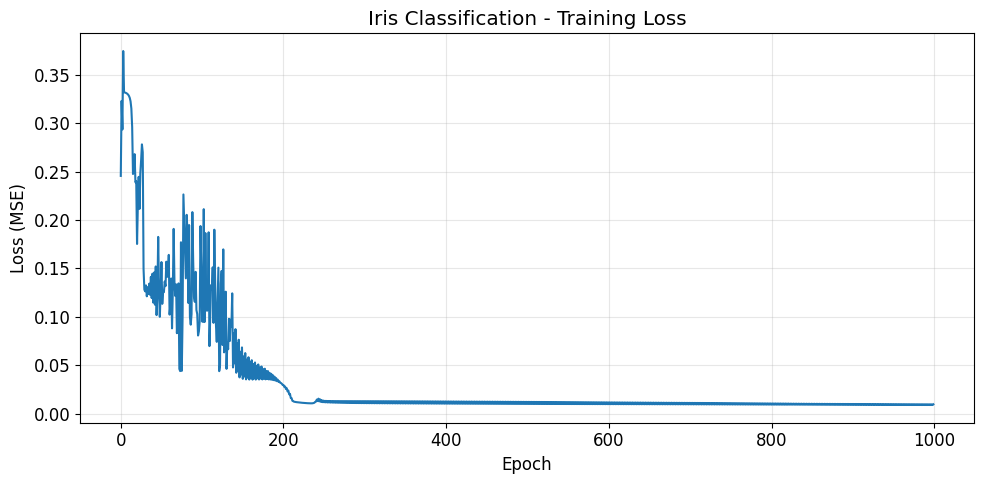

Figure saved as 'iris_training_loss.png'


In [266]:
plt.figure(figsize=(10, 5))
plt.plot(losses_iris)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Iris Classification - Training Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('iris_training_loss.png', dpi=150)
plt.show()
print("Figure saved as 'iris_training_loss.png'")

### Task 4.3: Evaluate on Test Set

In [267]:
# Predictions
y_pred = mlp_iris.predict(X_test)
y_true = np.argmax(y_test, axis=1)
# Accuracy
accuracy = np.mean(y_pred == y_true)
print("Test Set Evaluation")
print("=" * 50)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Correct predictions: {np.sum(y_pred == y_true)}/{len(y_true)}")

Test Set Evaluation
Test Accuracy: 93.33%
Correct predictions: 28/30


## Exercise 5: Confusion Matrix (From Scratch)

### Task 5.1: Implement Confusion Matrix 

In [268]:
def compute_confusion_matrix(y_true, y_pred, n_classes):
    """
    Compute confusion matrix from scratch.
    
    Parameters:
    ----------
    y_true : array-like
        True class labels
    y_pred : array-like
        Predicted class labels
    n_classes : int
        Number of classes
        
    Returns:
    -------
    ndarray : Confusion matrix of shape (n_classes, n_classes)
    """
    cm = np.zeros((n_classes, n_classes), dtype=int)
    
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1
    
    return cm
# Compute confusion matrix
cm = compute_confusion_matrix(y_true, y_pred, n_classes=3)
print("Confusion Matrix (from scratch)")
print("=" * 50)
print(cm)
print(f"\nRows = Actual, Columns = Predicted")
print(f"Diagonal = Correct predictions")

Confusion Matrix (from scratch)
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Rows = Actual, Columns = Predicted
Diagonal = Correct predictions


### Task 5.2: Verify with sklearn

In [269]:
from sklearn.metrics import confusion_matrix as sklearn_cm, classification_report
# sklearn's confusion matrix (should match ours)
cm_sklearn = sklearn_cm(y_true, y_pred)
print("Verification with sklearn")
print("=" * 50)
print("Our confusion matrix:")
print(cm)
print("\nsklearn confusion matrix:")
print(cm_sklearn)
print(f"\nMatrices match: {np.array_equal(cm, cm_sklearn)}")
# Full classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=iris.target_names))

Verification with sklearn
Our confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

sklearn confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Matrices match: True

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### Task 5.3: Visualise the Confusion Matrix

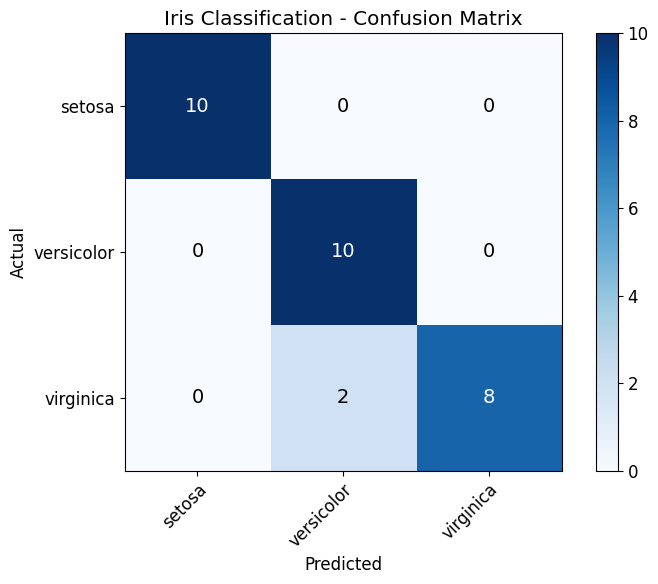

Figure saved as 'iris_confusion_matrix.png'


In [270]:
def plot_confusion_matrix(cm, class_names, title="Confusion Matrix"):
    """
    Plot confusion matrix as a heatmap.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           title=title,
           ylabel='Actual',
           xlabel='Predicted')
    
    # Rotate tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=14)
    
    plt.tight_layout()
    return fig

# Plot
fig = plot_confusion_matrix(cm, iris.target_names, "Iris Classification - Confusion Matrix")
plt.savefig('iris_confusion_matrix.png', dpi=150)
plt.show()
print("Figure saved as 'iris_confusion_matrix.png'")


### Task 5.4: Compute Performance Metrics

In [271]:
def compute_metrics(cm):
    """Compute accuracy, precision, and recall from confusion matrix."""
    n_classes = cm.shape[0]
    
    # Accuracy: sum of diagonal / total
    accuracy = np.trace(cm) / np.sum(cm)
    
    # Per-class precision and recall
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    
    for i in range(n_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp  # Column sum minus TP
        fn = np.sum(cm[i, :]) - tp  # Row sum minus TP
        
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return accuracy, precision, recall
# Compute metrics
accuracy, precision, recall = compute_metrics(cm)
print("Performance Metrics")
print("=" * 50)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"\nPer-class metrics:")
print(f"{'Class':<15} {'Precision':<12} {'Recall':<12}")
print("-" * 39)
for i, name in enumerate(iris.target_names):
    print(f"{name:<15} {precision[i]*100:>8.2f}%    {recall[i]*100:>8.2f}%")

Performance Metrics
Overall Accuracy: 93.33%

Per-class metrics:
Class           Precision    Recall      
---------------------------------------
setosa            100.00%      100.00%
versicolor         83.33%      100.00%
virginica         100.00%       80.00%


## Exercise 6: Compare with sklearn's MLPClassifier

In [272]:
# sklearn MLP
sklearn_mlp = MLPClassifier(
    hidden_layer_sizes=(8,),      # One hidden layer with 8 neurons
    activation='logistic',         # Sigmoid activation
    solver='sgd',                  # Stochastic gradient descent
    learning_rate_init=0.5,
    max_iter=1000,
    random_state=42
)
# Train (sklearn receives class labels, not one-hot)
sklearn_mlp.fit(X_train, y_train_labels)
# Evaluate
sklearn_pred = sklearn_mlp.predict(X_test)
sklearn_accuracy = accuracy_score(y_test_labels, sklearn_pred)
print("Comparison: Our MLP vs sklearn MLPClassifier")
print("=" * 50)
print(f"Our MLP Accuracy:     {accuracy * 100:.2f}%")
print(f"sklearn MLP Accuracy: {sklearn_accuracy * 100:.2f}%")
print(f"\nsklearn typically achieves higher accuracy due to its optimisations.")

Comparison: Our MLP vs sklearn MLPClassifier
Our MLP Accuracy:     93.33%
sklearn MLP Accuracy: 96.67%

sklearn typically achieves higher accuracy due to its optimisations.


## Exercise 7: Cross-Validation

10-Fold Cross-Validation Results
Fold scores: [1.         1.         1.         0.93333333 0.93333333 1.
 0.86666667 1.         1.         1.        ]

Mean accuracy: 97.33%
Standard deviation: 4.42%

95% confidence interval: 97.33% ± 8.67%


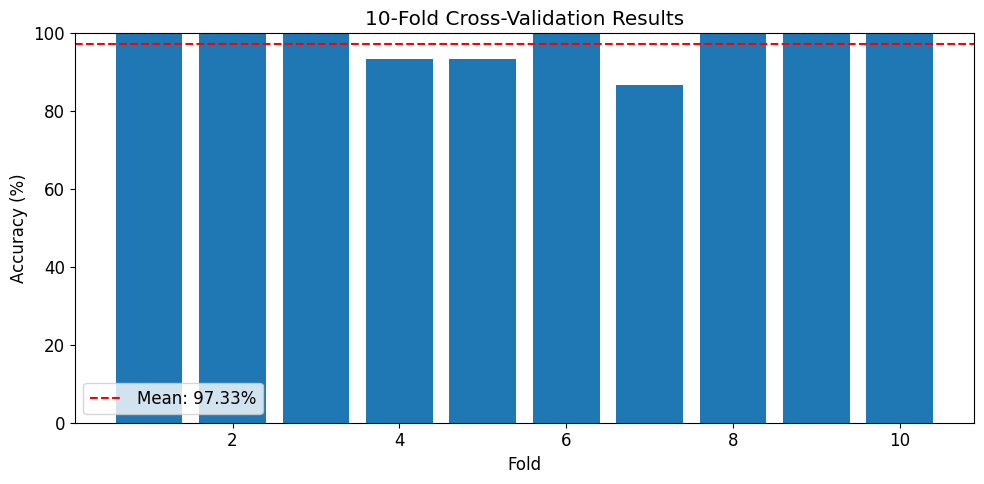

Figure saved as 'cross_validation_results.png'


In [273]:
# Create sklearn MLP for cross-validation
sklearn_mlp_cv = MLPClassifier(
    hidden_layer_sizes=(8,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.5,
    max_iter=1000,
    random_state=42
)

# 10-fold cross-validation
cv_scores = cross_val_score(sklearn_mlp_cv, X_normalised, y, cv=10)

print("10-Fold Cross-Validation Results")
print("=" * 50)
print(f"Fold scores: {cv_scores}")
print(f"\nMean accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation: {cv_scores.std() * 100:.2f}%")
print(f"\n95% confidence interval: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100*1.96:.2f}%")

# Visualise
plt.figure(figsize=(10, 5))
plt.bar(range(1, 11), cv_scores * 100)
plt.axhline(y=cv_scores.mean() * 100, color='r', linestyle='--', label=f'Mean: {cv_scores.mean()*100:.2f}%')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('10-Fold Cross-Validation Results')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.savefig('cross_validation_results.png', dpi=150)
plt.show()
print("Figure saved as 'cross_validation_results.png'")


## Exercise 8: Text Classification with Vector Hashing

### Exercise 8.1

In [274]:
# Sample dataset: Positive and negative reviews
# 40 reviews total (20 positive, 20 negative) for proper 5-fold CV
reviews = [
    # Positive reviews (label = 1)
    ("Great product, love it!", 1),
    ("Excellent quality and fast delivery", 1),
    ("Best purchase I have ever made", 1),
    ("Amazing service, highly recommend", 1),
    ("Wonderful experience, will buy again", 1),
    ("Perfect, exactly what I needed", 1),
    ("Fantastic value for money", 1),
    ("Love this product so much", 1),
    ("Absolutely brilliant, exceeded expectations", 1),
    ("Super happy with my purchase", 1),
    ("Outstanding quality and great price", 1),
    ("Highly satisfied, would recommend to friends", 1),
    ("Impressive quality, very pleased", 1),
    ("Delightful product, works perfectly", 1),
    ("Exceptional value, fast shipping too", 1),
    ("Really love it, great buy", 1),
    ("Superb quality, five stars", 1),
    ("Very impressed, excellent product", 1),
    ("Terrific purchase, highly recommend", 1),
    ("Great value, works as expected", 1),
    
    # Negative reviews (label = 0)
    ("Terrible, don't buy this", 0),
    ("Worst product I have ever bought", 0),
    ("Very disappointed with quality", 0),
    ("Awful experience, waste of money", 0),
    ("Poor quality, broke after one day", 0),
    ("Do not recommend this product", 0),
    ("Horrible, want my money back", 0),
    ("Bad purchase, very unhappy", 0),
    ("Complete rubbish, total disappointment", 0),
    ("Defective item, poor customer service", 0),
    ("Absolutely dreadful, avoid at all costs", 0),
    ("Useless product, completely dissatisfied", 0),
    ("Cheap quality, not worth it", 0),
    ("Disappointing purchase, broke quickly", 0),
    ("Regret buying this, poor value", 0),
    ("Frustrating experience, bad product", 0),
    ("Substandard quality, very unhappy", 0),
    ("Faulty product, terrible service", 0),
    ("Would not recommend, waste of time", 0),
    ("Inferior quality, money wasted", 0),
]

print(f"Dataset: {len(reviews)} reviews")
print(f"Positive: {sum(1 for _, l in reviews if l == 1)}")
print(f"Negative: {sum(1 for _, l in reviews if l == 0)}")

Dataset: 40 reviews
Positive: 20
Negative: 20


### Task 8.2: Implement N-gram Extraction

In [275]:
def extract_word_ngrams(text, n=2):
    """
    Extract word n-grams from text.
    
    Example:
    "Great product love" -> ["Great product", "product love"]
    """
    # Clean text and split into words
    text_clean = text.lower()
    for char in [',', '!', '.', "'", '"']:
        text_clean = text_clean.replace(char, '')
    words = text_clean.split()
    
    # Extract n-grams
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    
    return ngrams

# Test
test_text = "Great product, love it!"
print(f"Text: {test_text}")
print(f"2-grams: {extract_word_ngrams(test_text, n=2)}")


Text: Great product, love it!
2-grams: ['great product', 'product love', 'love it']


### Task 8.3: Implement Vector Hashing

In [276]:
def hash_ngram(ngram, vector_size):
    """Hash an n-gram to an index using ASCII sum."""
    ascii_sum = sum(ord(char) for char in ngram)
    return ascii_sum % vector_size
def text_to_vector(text, vector_size=10, n=2):
    """
    Convert text to a fixed-size vector using n-gram hashing.
    """
    # Initialise vector
    vector = np.zeros(vector_size)
    
    # Extract n-grams and hash
    ngrams = extract_word_ngrams(text, n)
    for ngram in ngrams:
        index = hash_ngram(ngram, vector_size)
        vector[index] += 1
    
    return vector
# Test with example from slides
test_reviews = [
    "Great product, love it!",
    "Terrible, don't buy",
    "Okay, but not great",
]
print("Vector Hashing Examples (vector_size=10):")
print("=" * 60)
for text in test_reviews:
    ngrams = extract_word_ngrams(text, n=2)
    vec = text_to_vector(text, vector_size=10, n=2)
    print(f"\nText: {text}")
    print(f"2-grams: {ngrams}")
    for ng in ngrams:
        idx = hash_ngram(ng, 10)
        ascii_sum = sum(ord(c) for c in ng)
        print(f"  '{ng}' -> ASCII sum: {ascii_sum} -> index: {idx}")
    print(f"Vector: {vec.astype(int)}")

Vector Hashing Examples (vector_size=10):

Text: Great product, love it!
2-grams: ['great product', 'product love', 'love it']
  'great product' -> ASCII sum: 1332 -> index: 2
  'product love' -> ASCII sum: 1239 -> index: 9
  'love it' -> ASCII sum: 691 -> index: 1
Vector: [0 1 1 0 0 0 0 0 0 1]

Text: Terrible, don't buy
2-grams: ['terrible dont', 'dont buy']
  'terrible dont' -> ASCII sum: 1326 -> index: 6
  'dont buy' -> ASCII sum: 805 -> index: 5
Vector: [0 0 0 0 0 1 1 0 0 0]

Text: Okay, but not great
2-grams: ['okay but', 'but not', 'not great']
  'okay but' -> ASCII sum: 799 -> index: 9
  'but not' -> ASCII sum: 700 -> index: 0
  'not great' -> ASCII sum: 900 -> index: 0
Vector: [2 0 0 0 0 0 0 0 0 1]


### Task 8.4: Create Feature Matrix and Train Classifier

Feature matrix shape: (40, 200)
Labels shape: (40, 1)

Training MLP for sentiment classification...


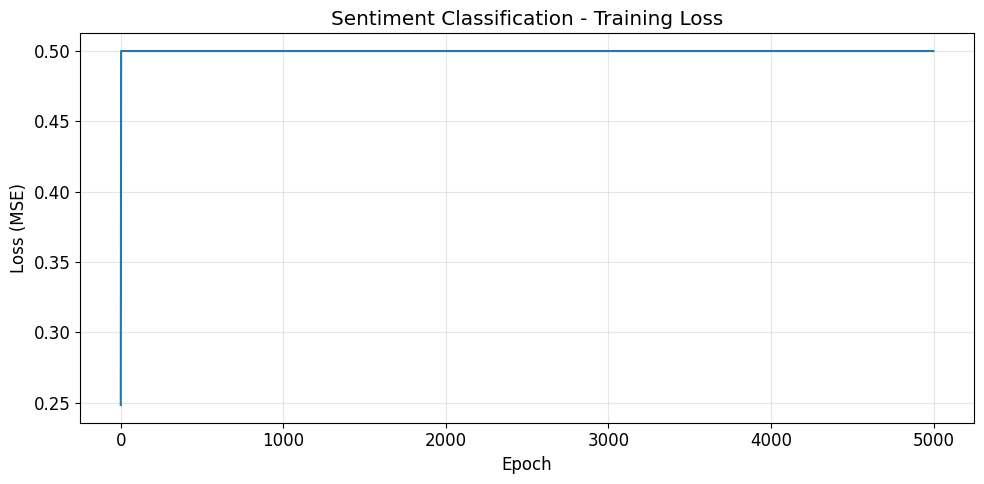


Training Set Results:
------------------------------------------------------------
Great product, love it!                    -> Negative (0.00) ✗
Excellent quality and fast delivery        -> Negative (0.00) ✗
Best purchase I have ever made             -> Negative (0.00) ✗
Amazing service, highly recommend          -> Negative (0.00) ✗
Wonderful experience, will buy again       -> Negative (0.00) ✗
Perfect, exactly what I needed             -> Negative (0.00) ✗
Fantastic value for money                  -> Negative (0.00) ✗
Love this product so much                  -> Negative (0.00) ✗
Absolutely brilliant, exceeded expectati   -> Negative (0.00) ✗
Super happy with my purchase               -> Negative (0.00) ✗
Outstanding quality and great price        -> Negative (0.00) ✗
Highly satisfied, would recommend to fri   -> Negative (0.00) ✗
Impressive quality, very pleased           -> Negative (0.00) ✗
Delightful product, works perfectly        -> Negative (0.00) ✗
Exceptional value, f

In [277]:
# Create feature matrix
vector_size = 200  # Larger for better separation
X_text = np.array([text_to_vector(text, vector_size, n=2) for text, _ in reviews])
y_text = np.array([label for _, label in reviews]).reshape(-1, 1)

print(f"Feature matrix shape: {X_text.shape}")
print(f"Labels shape: {y_text.shape}")

# Train MLP
np.random.seed(42)
# Create MLP with: vector_size inputs, 32 hidden neurons, 1 output, learning rate = 1.0
mlp_text = MLP(n_inputs=vector_size, n_hidden=32, n_outputs=1, learning_rate=1.0)

print("\nTraining MLP for sentiment classification...")
# Train MLP with 5000 epochs
losses_text = mlp_text.train(X_text, y_text, epochs=5000, verbose=False)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_text)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Sentiment Classification - Training Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evaluate on training data
print("\nTraining Set Results:")
print("-" * 60)
correct = 0
for (text, label), x in zip(reviews, X_text):
    output = mlp_text.forward(x.reshape(1, -1))[0, 0]
    pred = 1 if output >= 0.5 else 0
    if pred == label:
        correct += 1
    sentiment = "Positive" if pred == 1 else "Negative"
    mark = "✓" if pred == label else "✗"
    print(f"{text[:40]:<42} -> {sentiment} ({output:.2f}) {mark}")

print(f"\nTraining Accuracy: {correct}/{len(reviews)} = {correct/len(reviews)*100:.1f}%")


### Task 8.5: Test on New Reviews

In [278]:
# These sentences reuse word pairs (2-grams) from the training data
test_reviews_new = [
    "Great product, value for money",  # "great product", "value for" from training
    "Very disappointed, waste of money",  # "very disappointed", "waste of" from training
    "Love it, will buy again",  # "love it", "buy again" from training
    "Do not recommend, very unhappy",  # "do not", "not recommend" from training
    "Excellent quality, exceeded expectations",  # "excellent quality", "exceeded expectations" from training
    "Terrible, want my money back",  # "want my", "my money", "money back" from training
]

print("Testing on New Reviews:")
print("=" * 60)
for review in test_reviews_new:
    vec = text_to_vector(review, vector_size, n=2)
    output = mlp_text.forward(vec.reshape(1, -1))[0, 0]
    sentiment = "Positive" if output >= 0.5 else "Negative"
    confidence = output if output >= 0.5 else 1 - output
    print(f"\n\"{review}\"")
    print(f"  -> {sentiment} (raw output: {output:.3f}, confidence: {confidence:.1%})")


Testing on New Reviews:

"Great product, value for money"
  -> Negative (raw output: 0.000, confidence: 100.0%)

"Very disappointed, waste of money"
  -> Negative (raw output: 0.000, confidence: 100.0%)

"Love it, will buy again"
  -> Negative (raw output: 0.000, confidence: 100.0%)

"Do not recommend, very unhappy"
  -> Negative (raw output: 0.000, confidence: 100.0%)

"Excellent quality, exceeded expectations"
  -> Negative (raw output: 0.000, confidence: 100.0%)

"Terrible, want my money back"
  -> Negative (raw output: 0.000, confidence: 100.0%)


### Task 8.6: ROC Curve and AUC

Got 40 out-of-fold predictions from 5-fold CV
Each prediction was made when that sample was in the test fold


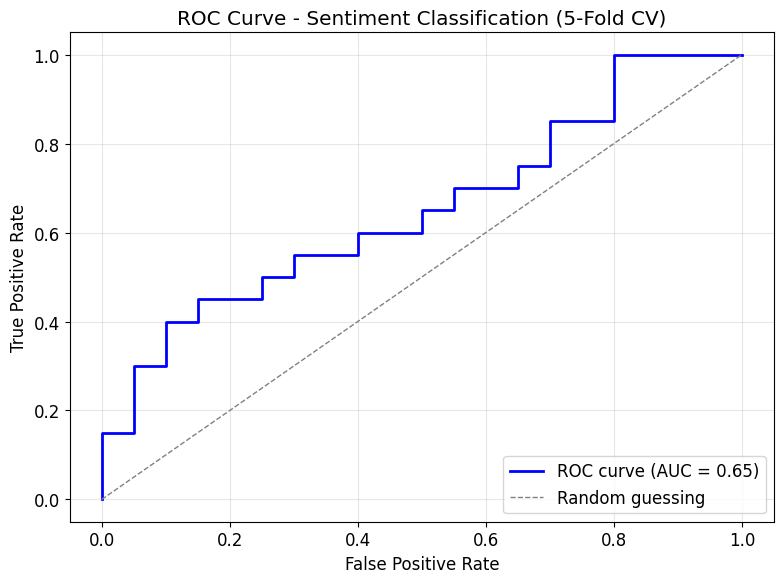


AUC Score: 0.652
AUC = 1.0 means perfect classification
AUC = 0.5 means random guessing

Note: This ROC is computed from out-of-fold predictions,
giving a realistic estimate of generalisation performance.


In [279]:
# Train sklearn MLP with 5-fold CV and plot ROC curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Prepare data (using the same features from our from-scratch implementation)
y_binary = y_text.flatten()  # Labels as 1D array

# Create sklearn MLP with adam solver (optimizer) for better convergence
# 32 hidden neurons, logistic activation (sigmoid), 
# initial learning rate 0.01, 2000 epochs (iterations), random seed 42
sklearn_mlp = MLPClassifier(
    hidden_layer_sizes=(32,),
    activation='logistic',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=2000,
    random_state=42
)

# Get out-of-fold probability predictions using 5-fold CV
# Each sample is predicted when it's in the test fold (not seen during training)
y_probs = cross_val_predict(
    sklearn_mlp, 
    X_text, 
    y_binary, 
    cv=5,                       # 5-fold cross-validation
    method='predict_proba'      # Get probabilities, not just predictions
)[:, 1]  # Probability of class 1 (positive)

print(f"Got {len(y_probs)} out-of-fold predictions from 5-fold CV")
print(f"Each prediction was made when that sample was in the test fold")

# Compute ROC curve from cross-validated predictions
fpr, tpr, thresholds = roc_curve(y_binary, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sentiment Classification (5-Fold CV)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_roc_curve.png', dpi=150)
plt.show()

print(f"\nAUC Score: {roc_auc:.3f}")
print("AUC = 1.0 means perfect classification")
print("AUC = 0.5 means random guessing")
print("\nNote: This ROC is computed from out-of-fold predictions,")
print("giving a realistic estimate of generalisation performance.")
